# What is CNN?

CNN stands for Convolutional Neural Network. It works by splitting images into convolutions and then perform deep learning in that image.

CNN is used mostly in image classification. It is specifically designed for image data, capturing spatial patterns using:
1. Convolution (feature extraction)
2. Pooling (downsampling)
3. Fully connected layers (classification)

Why is CNN used for image detection instead of normal neural networks (ANN)?

1. ANN treats image as a 1D-vector -> loses spatial information
2. CNN preserves height x width x channel structure
3. Used shared weights -> fewer parameters to train -> less overfitting chances


Key Concepts:

1. Convolution Operation -> applying filters to detect the features.
2. Feature Maps -> outputs after applying filters
3. Stride and padding -> control how the filter moves
4. Pooling (Max/Average) -> reduce dimensionality
5. Activation Functions -> ReLU almost always used
6. Flatten -> Dense -> Softmax


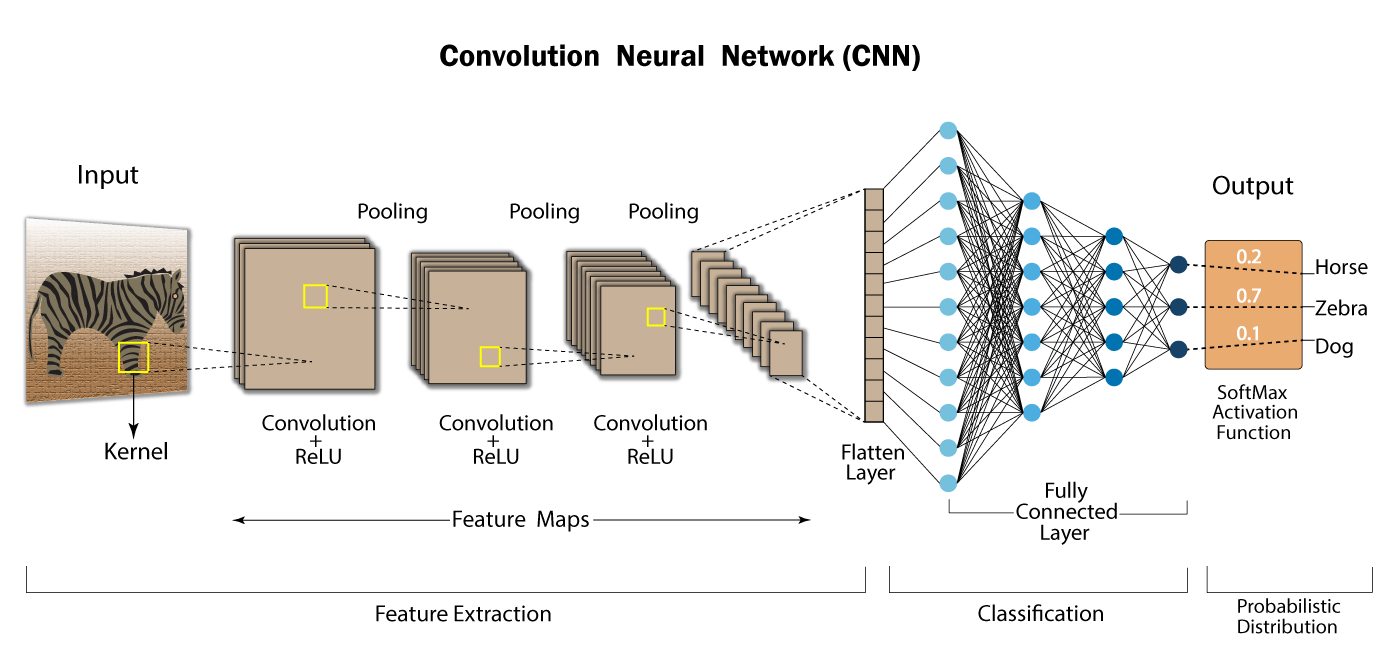

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

/Users/ssharma/Desktop/python_tutorial/data_science/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train/255.0, X_test/255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 95s 1us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
y_train.shape

(50000, 10)

In [8]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [15]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10


2025-12-08 18:22:35.616886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.3740 - loss: 1.7371 - val_accuracy: 0.5543 - val_loss: 1.2681
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.5840 - loss: 1.1771 - val_accuracy: 0.6164 - val_loss: 1.0977
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.6378 - loss: 1.0430 - val_accuracy: 0.6405 - val_loss: 1.0417
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.6539 - loss: 1.0100 - val_accuracy: 0.6305 - val_loss: 1.1286
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.6407 - loss: 1.0861 - val_accuracy: 0.5933 - val_loss: 1.3828
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.6127 - loss: 1.2981 - val_accuracy: 0.5302 - val_loss: 1.9613
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.5885 - loss: 1.7145 - val_accuracy: 0.5191 - val_loss: 2.9555
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.5349 - loss: 3.2299 - val_accurac

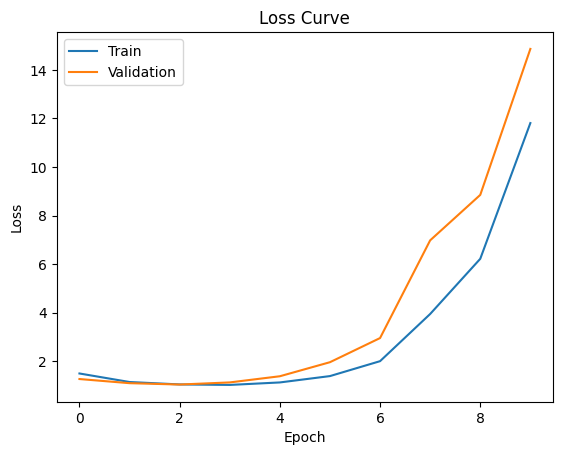

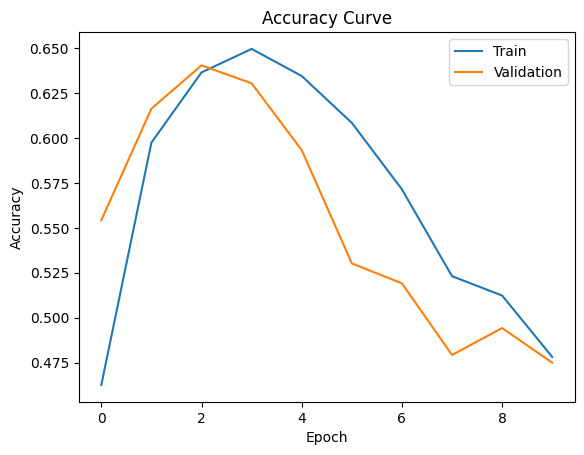

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train","Validation"])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train","Validation"])
plt.show()

In [20]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape the image into (28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255

In [22]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [23]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [24]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:
history = model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9801 - loss: 0.1766 - val_accuracy: 0.9778 - val_loss: 0.3964
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9787 - loss: 0.4468 - val_accuracy: 0.9743 - val_loss: 0.9908
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9787 - loss: 0.8780 - val_accuracy: 0.9757 - val_loss: 1.6786
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9773 - loss: 1.6700 - val_accuracy: 0.9823 - val_loss: 2.6725
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9775 - loss: 2.9173 - val_accuracy: 0.9793 - val_loss: 4.5891


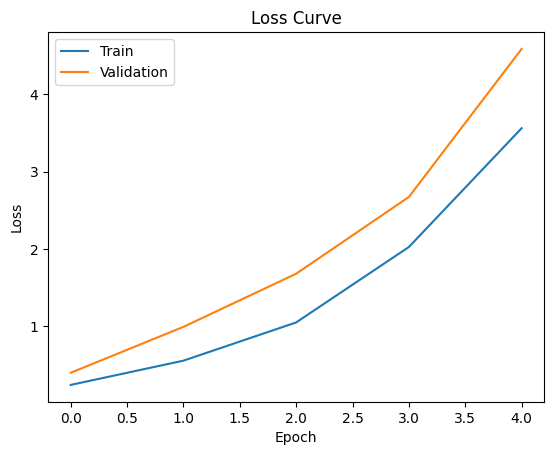

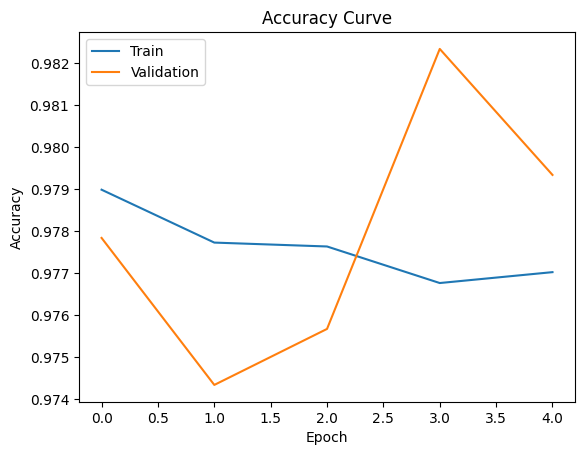

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train","Validation"])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train","Validation"])
plt.show()

In [31]:
test_loss, test_acc = model.evaluate(X_test, y_test)
test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9723 - loss: 4.7293


0.9768999814987183

In [34]:
import numpy as np

In [35]:
np.random.choice(len(X_test), 1, replace=False)

array([3865])

In [41]:
y_test[3865]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [37]:
X_test[3865].shape

(28, 28, 1)

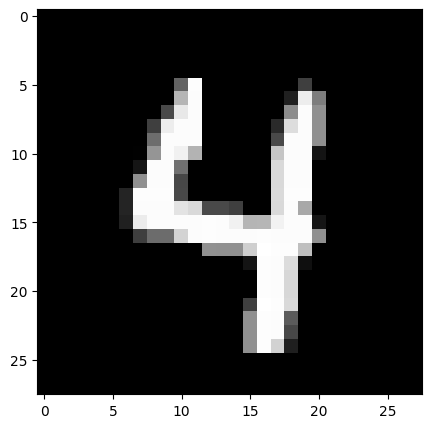

In [38]:
plt.figure(figsize=(12, 5))

plt.imshow(X_test[3865].reshape(28, 28), cmap='gray')
plt.show()

In [39]:
img = X_test[3865]
prediction = model.predict(np.array([img]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step


In [40]:
prediction

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [42]:
np.argmax(prediction)

4